# Asymptotic Vocabulary

<div class="alert alert-success"> 
Asymptotic behavior of the vocabulary set size necessary to describe an emoji vs number of users
==> How many users does it take to reach a stationary phase for a given emoji?
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from scipy.spatial import distance
import pickle as pk
from src.exploration.form10_eda import read_form, str2vocab
from src.selection.distribution import plot_multi_trajectories,plot_trajectories, build_trajectory
from src.constants import PILOT_1_DIR,PILOT_0_DIR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pdb import set_trace
import warnings
from src.analysis.fraudulous import *
from src.exploration.form10_eda import plot_emoji_time, read_meta
from IPython.display import set_matplotlib_formats
import pickle as pk
set_matplotlib_formats('retina')
warnings.filterwarnings('ignore')
sns.set()

## Fraud Detection, again

In [6]:
asymp_df1 = read_form(PILOT_1_DIR.joinpath("Asymptotic_Emoji_Agreement_1.csv"))

asymp_df1.drop(columns=['👕','🚓','🇵🇱','💱'],inplace=True)
asymp_df2 = read_form(PILOT_1_DIR.joinpath("Asymptotic_Emoji_Agreement_2.csv"))
asymp_df = pd.concat([asymp_df1,asymp_df2],axis=0)

filter_funcs = [dtct_poor_voc,
                dtct_cstt_answer,
                dtct_duplicate_answer
]
fraud_hat = find_fraudulous(asymp_df,filter_funcs)
fraud_hat

{'dtct_poor_voc': [],
 'dtct_cstt_answer': [],
 'dtct_duplicate_answer': {'AHTWZ3AZGAGSH'}}

# Asymptotic Behavior Analysis

In [7]:
asymp_df = str2vocab(asymp_df)

😋🤙🧓🌏😚🍕🥊📍

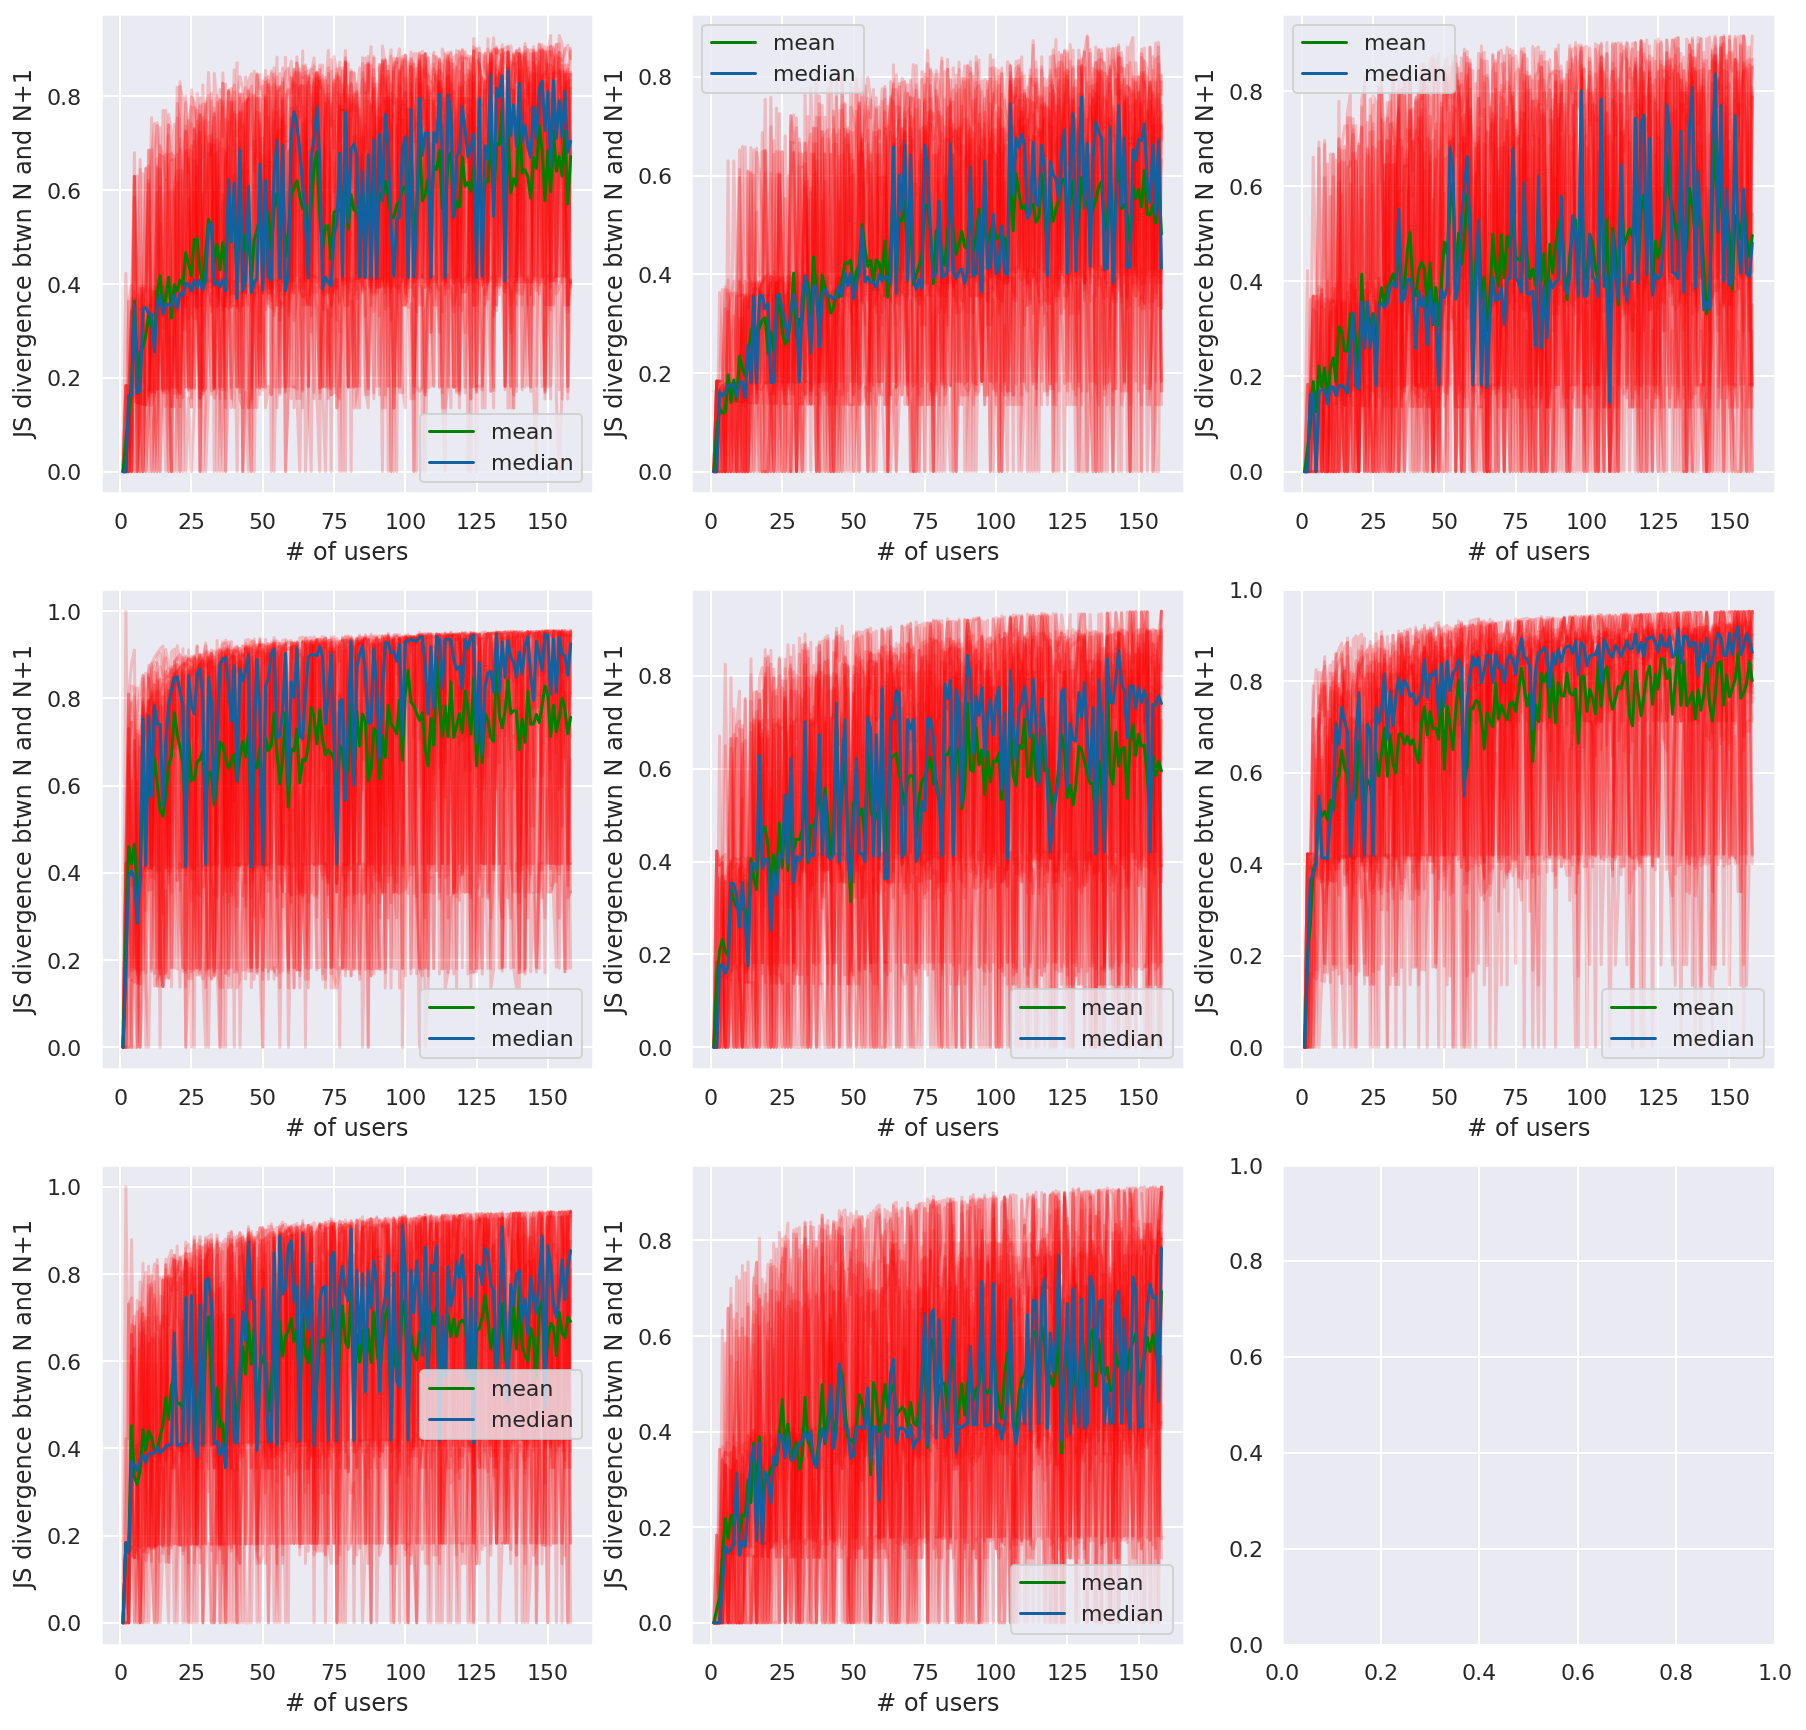

In [8]:
plot_multi_trajectories(asymp_df,rand_norm_traj=True)

😋🤙🧓🌏😚🍕🥊📍

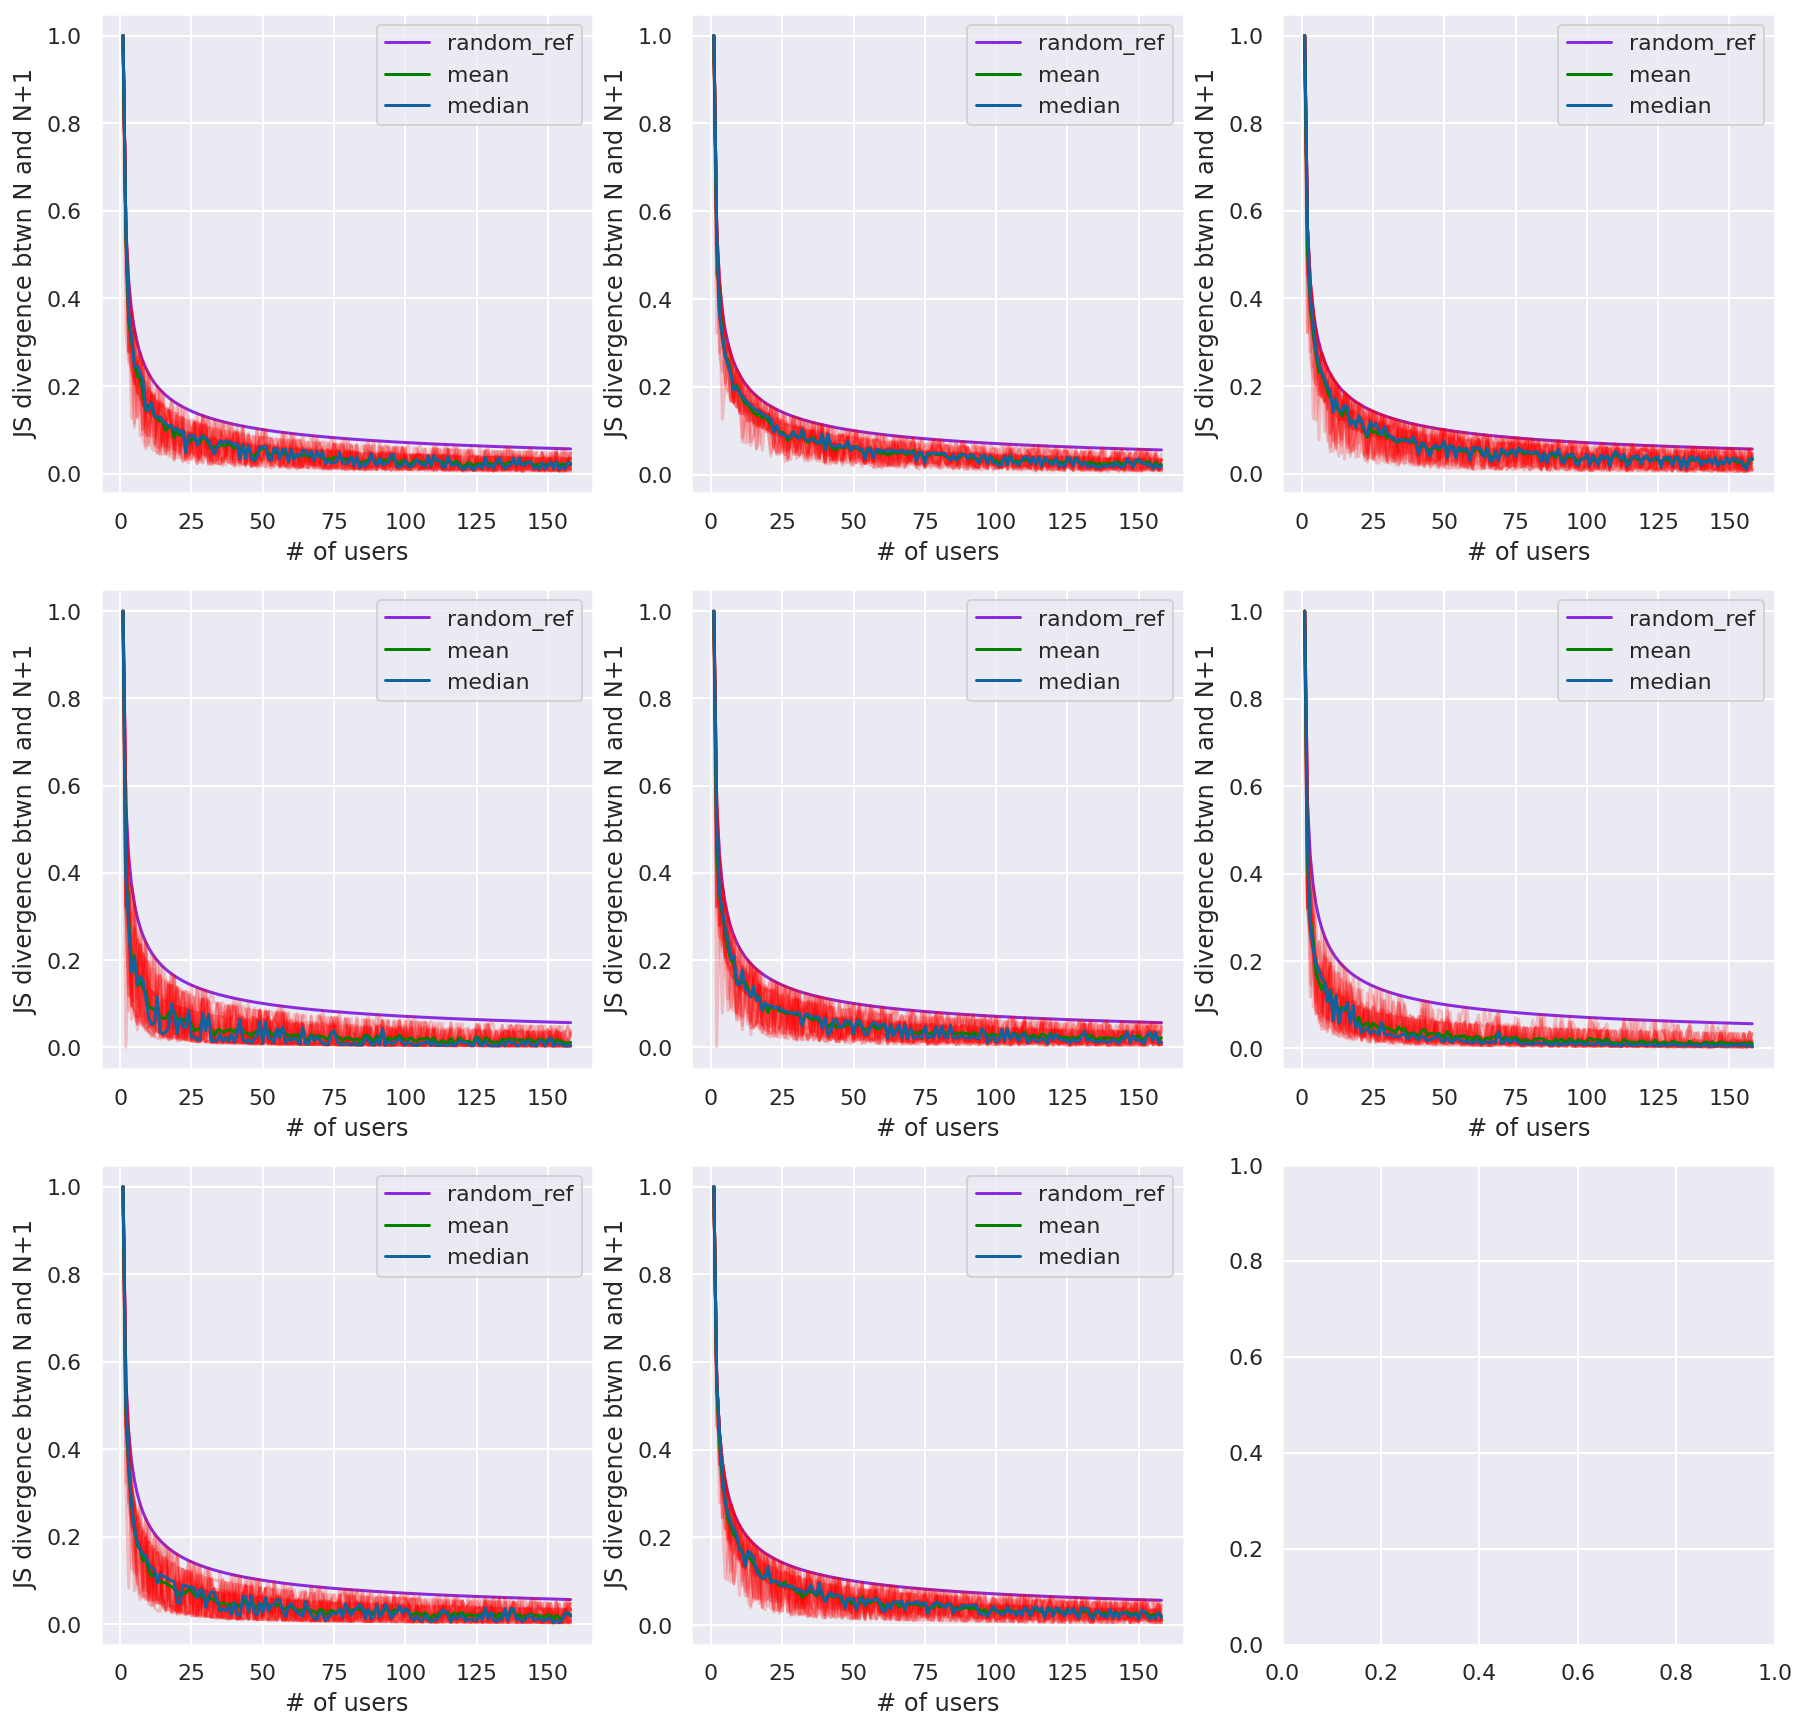

In [9]:
plot_multi_trajectories(asymp_df,log_scale=False)

😋🤙🧓🌏😚🍕🥊📍

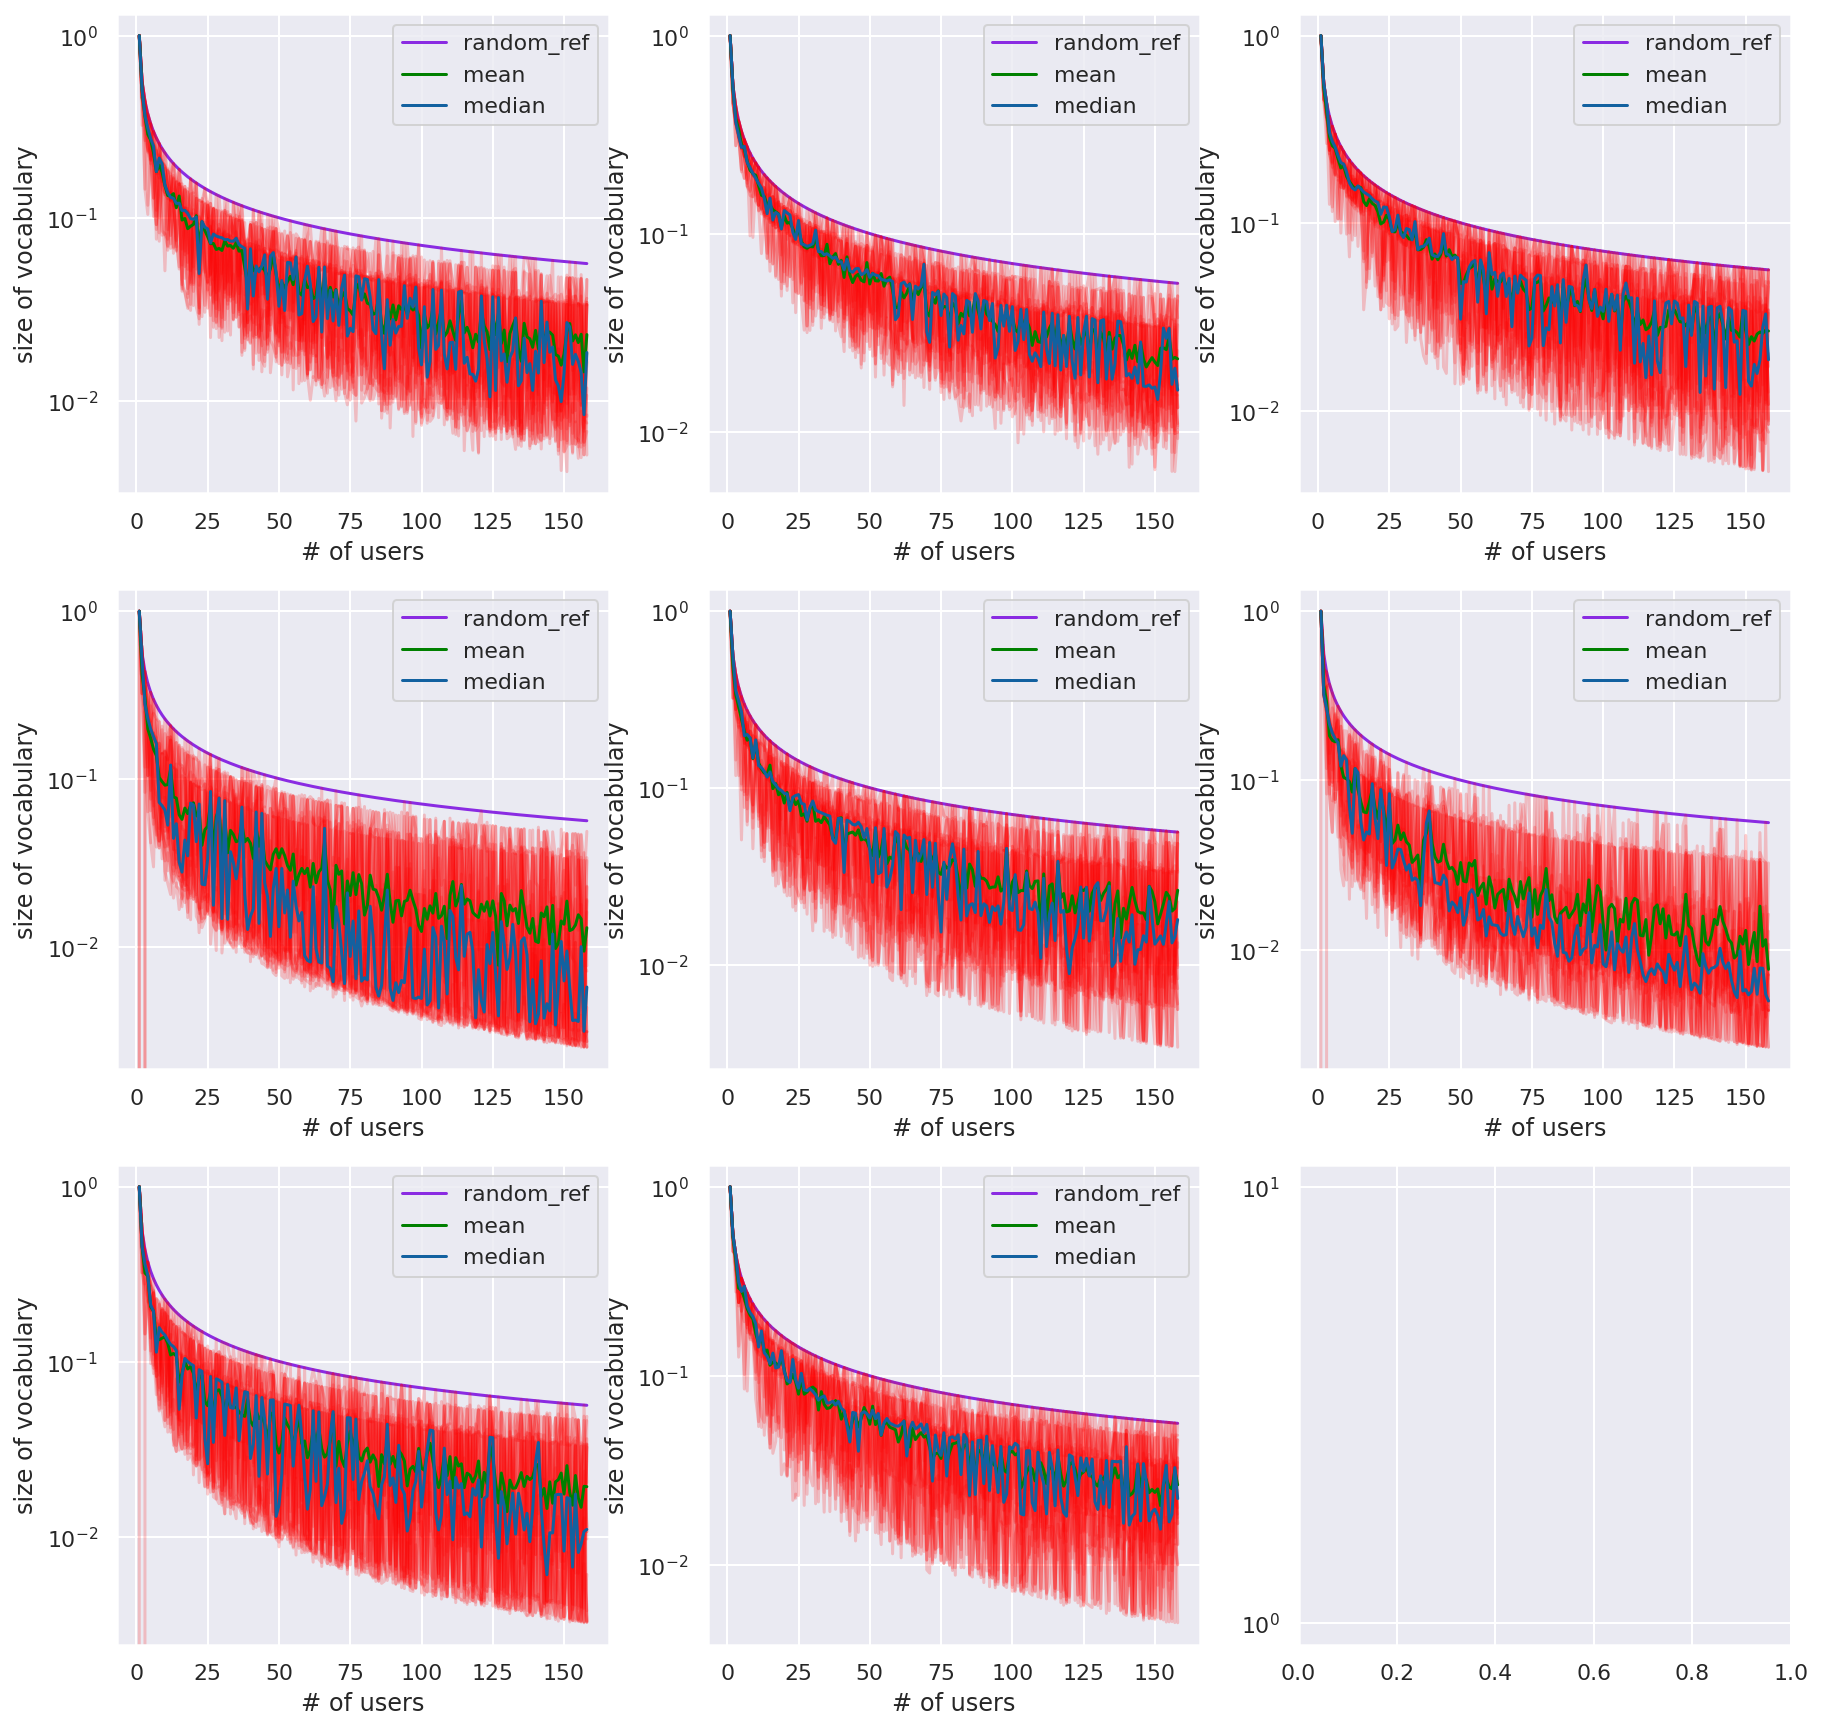

In [76]:
plot_multi_trajectories(asymp_df,log_scale=True)

## Completion Time Analysis

Median: 67 seconds
Mean: 86 seconds


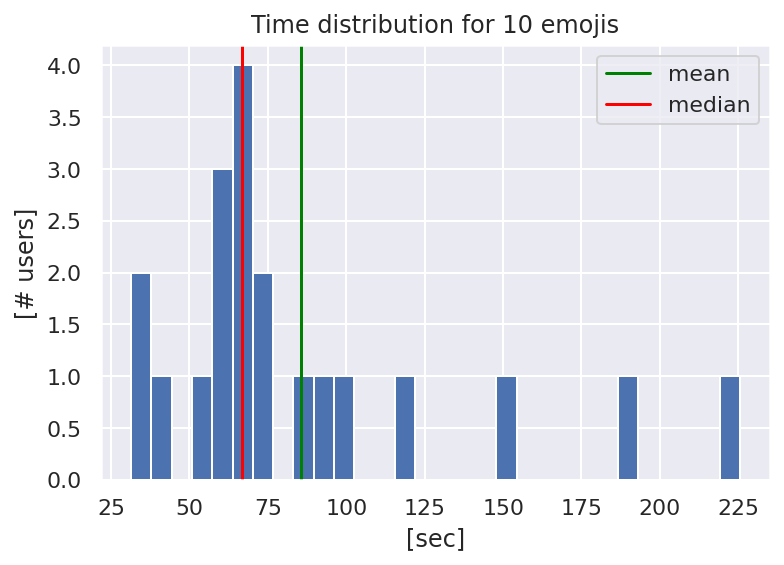

In [20]:
asymp_meta_df = read_meta(str(PILOT_0_DIR.joinpath("Emojis10_4META.csv")),asymp_df.shape[1])

fig,ax = plt.subplots(1)
plot_emoji_time(asymp_meta_df,ax)